<a href="https://colab.research.google.com/github/rihannababzadeh/Machine-Learning-Projects/blob/main/Final_Project3_ECE710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_rows', 20) # number of rows for printing
import pickle

In [ ]:
# Loading the dataset in a pandas dataframe from a CSV file in Google Colab
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
#if you are not using Google Colab please use the following line to read the csv file
#data=pd.read_csv('data.csv')

Saving data.csv to data.csv


In [ ]:
#looking at the loaded dataset
data.head()

,Change,AVR,Torsion,RC,Curve,Unnamed: 5
0,-8.0,1.7,2.53,0.10,20.0,0
1,-10.0,-3.1,-1.03,0.09,35.0,0
2,8.0,-4.2,0.00,0.08,24.0,0
3,1.0,4.4,2.27,0.09,14.0,0
4,7.0,7.9,3.37,0.06,38.0,0


# Pre-processing

In [ ]:
# g = sns.pairplot(data, hue = 'Output')

In [ ]:
#Relationship between features and the output
#features = ['Change','AVR','Torsion','RC','Curve']
features = ['Change','AVR','Torsion','RC','Curve']

for f in features:
    sns.countplot(x = f, data = data, palette = 'Set3', hue = 'Output')
    plt.show()

ValueError: ignored

In [ ]:
#we need to make the Output column numerican
data["Output"].unique()#P is going to be 1 and NP is going to be 0 
class_dict = {"P": 1, "NP": 0}
data['Class'] = data['Output'].map(class_dict)
data

,ID,Output,Change,AVR,Torsion,RC,Curve,Class
0,SRS85,NP,-8.0,1.7,2.53,0.10,20,0
1,SRS87,NP,-10.0,-3.1,-1.03,0.09,35,0
2,US17,NP,8.0,-4.2,0.00,0.08,24,0
3,US83,NP,1.0,4.4,2.27,0.09,14,0
4,US19,NP,7.0,7.9,3.37,0.06,38,0
...,...,...,...,...,...,...,...,...
150,SRS84,NP,-4.0,2.3,-2.57,0.05,20,0
151,SRS117,P,-1.0,1.5,0.43,0.07,14,1
152,SRS120,NP,-5.0,-4.2,-3.70,0.10,10,0
153,SRS133,P,7.0,10.2,2.60,0.08,33,1


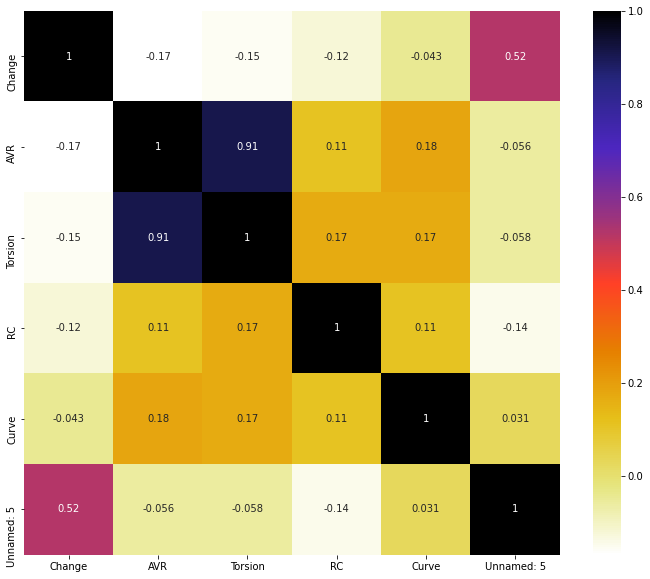

In [ ]:
import seaborn as sns
#Using Pearson Correlation between featurs and output
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#we need to check the dataset to see what information we have and if there are null cells
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Change      244 non-null    float64
 1   AVR         244 non-null    float64
 2   Torsion     244 non-null    float64
 3   RC          244 non-null    float64
 4   Curve       244 non-null    float64
 5   Unnamed: 5  244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.6 KB


In [ ]:
#there is only one row containing one null cell(US Cobb Change) and we can delete it
data.isnull()

,Change,AVR,Torsion,RC,Curve,Unnamed: 5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
239,False,False,False,False,False,False
240,False,False,False,False,False,False
241,False,False,False,False,False,False
242,False,False,False,False,False,False


In [ ]:
#the result is a dataset with no null cell
df = data.dropna(how='any',axis=0) 
#we do not need to keep "Output" as we have added a 0/1 class instead
#rhe ID column is not useful for us in the predition model

In [ ]:
# removing outliers
z= np.abs(stats.zscore(df["Curve"])) # Utilizing zscore to remove outliers
#we tried all features and none of them was removed
filtered_df = (z < 3) # Removing values with zscore greater than 3 standard deviation
df = df[filtered_df] # Filtered data set with removed outliers
df

,Change,AVR,Torsion,RC,Curve,Class
0,-8.0,1.7,2.53,0.10,20,0
1,-10.0,-3.1,-1.03,0.09,35,0
2,8.0,-4.2,0.00,0.08,24,0
3,1.0,4.4,2.27,0.09,14,0
4,7.0,7.9,3.37,0.06,38,0
...,...,...,...,...,...,...
150,-4.0,2.3,-2.57,0.05,20,0
151,-1.0,1.5,0.43,0.07,14,1
152,-5.0,-4.2,-3.70,0.10,10,0
153,7.0,10.2,2.60,0.08,33,1


In [ ]:
#How the data will look like after splitting to x and y
print(df.iloc[:,:5]) #First five columns are the input data
print(df.iloc[:,5])  #The last column is the output data

        Change        AVR   Torsion        RC      Curve
0    -8.000000   1.700000  2.530000  0.100000  20.000000
1   -10.000000  -3.100000 -1.030000  0.090000  35.000000
2     8.000000  -4.200000  0.000000  0.080000  24.000000
3     1.000000   4.400000  2.270000  0.090000  14.000000
4     7.000000   7.900000  3.370000  0.060000  38.000000
..         ...        ...       ...       ...        ...
239   3.646895  13.305931  3.515848  0.046766  20.970343
240  -1.000000   3.900118  4.904506  0.112859  18.285925
241   6.449120   9.153329  2.374139  0.077246  35.203519
242   7.408632  12.337986  3.398561  0.023942  22.197123
243  -1.171424  -4.142881 -1.730865  0.058286  11.828576

[244 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    1
241    1
242    1
243    1
Name: Unnamed: 5, Length: 244, dtype: int64


In [ ]:
# Splitting dataset into inputs(x) and output(y)
X_df = df.iloc[:,:5]
y_df = df.iloc[:,5]

In [ ]:
print(X_df)
print(y_df)

     Change   AVR  Torsion    RC  Curve
0      -8.0   1.7     2.53  0.10     20
1     -10.0  -3.1    -1.03  0.09     35
2       8.0  -4.2     0.00  0.08     24
3       1.0   4.4     2.27  0.09     14
4       7.0   7.9     3.37  0.06     38
..      ...   ...      ...   ...    ...
150    -4.0   2.3    -2.57  0.05     20
151    -1.0   1.5     0.43  0.07     14
152    -5.0  -4.2    -3.70  0.10     10
153     7.0  10.2     2.60  0.08     33
154    -3.0  -2.0     0.70  0.10     19

[154 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
150    0
151    1
152    0
153    1
154    0
Name: Class, Length: 154, dtype: int64


## Oversampling with SMOTEENN

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# summarize the new class distribution
counter = Counter(y_df)
print(counter)

Counter({0: 122, 1: 32})


In [ ]:
pip install imbalanced-learn

In [ ]:
# # transform the dataset
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_dfs, y_dfs = oversample.fit_resample(X_df, y_df)

In [ ]:

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

oversample = SMOTEENN(random_state=42)
X_dfs, y_dfs = oversample.fit_resample(X_df, y_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_df.to_csv('final_data.csv') #save X-data

In [ ]:
# summarize the new class distribution
counter = Counter(y_dfs)
print(counter)

Counter({1: 68, 0: 59})


In [ ]:
#y_df = pd.DataFrame(data= y_dfs)
X_dfs

array([[-8.00000000e+00,  1.70000000e+00,  2.53000000e+00,
         1.00000000e-01,  2.00000000e+01],
       [-1.00000000e+01, -3.10000000e+00, -1.03000000e+00,
         9.00000000e-02,  3.50000000e+01],
       [ 1.00000000e+00,  4.40000000e+00,  2.27000000e+00,
         9.00000000e-02,  1.40000000e+01],
       [-1.00000000e+00,  1.15000000e+01,  3.83000000e+00,
         7.00000000e-02,  3.20000000e+01],
       [-1.20000000e+01,  1.10000000e+00,  3.10000000e-01,
         8.00000000e-02,  2.20000000e+01],
       [-7.00000000e+00, -4.70000000e+00,  3.16000000e+00,
         7.00000000e-02,  3.80000000e+01],
       [ 0.00000000e+00, -1.50000000e+00, -2.27000000e+00,
         9.00000000e-02,  2.30000000e+01],
       [-9.00000000e+00, -1.20000000e+00, -1.32000000e+00,
         9.00000000e-02,  1.70000000e+01],
       [ 4.00000000e+00,  1.17000000e+01,  3.34000000e+00,
         8.00000000e-02,  1.20000000e+01],
       [-1.30000000e+01, -2.20000000e+00, -2.25000000e+00,
         1.00000000e-01

In [ ]:
#convert back to dataframe
X_df=pd.DataFrame(data=X_dfs, columns=X_df.columns)
X_df

,Change,AVR,Torsion,RC,Curve
0,-8.000000,1.700000,2.530000,0.100000,20.000000
1,-10.000000,-3.100000,-1.030000,0.090000,35.000000
2,1.000000,4.400000,2.270000,0.090000,14.000000
3,-1.000000,11.500000,3.830000,0.070000,32.000000
4,-12.000000,1.100000,0.310000,0.080000,22.000000
...,...,...,...,...,...
122,9.049450,-10.373214,-3.341690,0.047624,37.197799
123,-1.367783,-3.161084,-1.422580,0.056322,11.632217
124,5.206165,14.308927,3.788141,0.057354,22.206165
125,4.068238,-6.457118,-3.045324,0.091676,17.701767


In [ ]:
y_df=pd.DataFrame(data=y_dfs)
y_df
y_df.to_csv('y_data.csv')

## **Standardization**

In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_df))
StandardScaler()
print(scaler.mean_)
X_df_s=scaler.transform(X_df)
X_df_sd = pd.DataFrame(data= X_df_s, columns=X_df.columns)  # Converting back the standardized dataset to a pandas dataframe
X_df_sd.head()

NameError: ignored

## Feature Selection

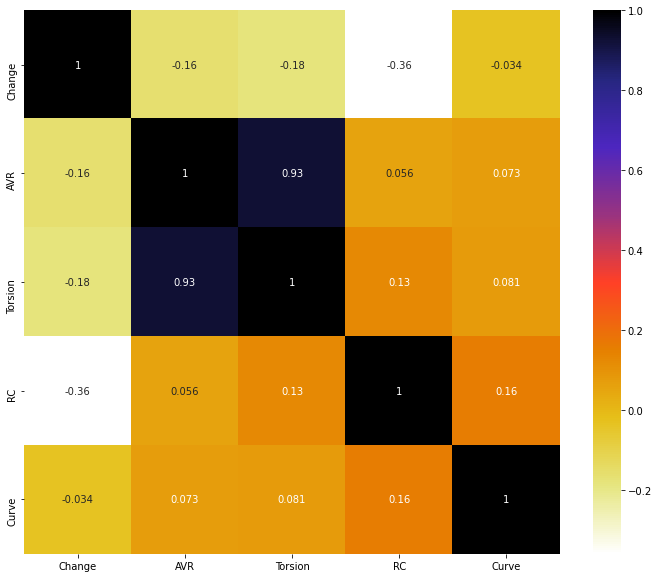

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_df_sd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from scipy.stats import pearsonr         #calculate the correlation for the dataset so we can remove the features that have high correlation

x_df=X_df_sd
correlation,p_value=pearsonr(x_df.iloc[:,0],x_df.iloc[:,1])
correlation,p_value=pearsonr(x_df.iloc[:,0],x_df.iloc[:,2])
correlation,p_value=pearsonr(x_df.iloc[:,0],x_df.iloc[:,3])
correlation,p_value=pearsonr(x_df.iloc[:,0],x_df.iloc[:,4])
correlation,p_value=pearsonr(x_df.iloc[:,1],x_df.iloc[:,2]) #This has a great correlation equal to 0.898
correlation,p_value=pearsonr(x_df.iloc[:,1],x_df.iloc[:,3])
correlation,p_value=pearsonr(x_df.iloc[:,1],x_df.iloc[:,4])
correlation,p_value=pearsonr(x_df.iloc[:,2],x_df.iloc[:,3])
correlation,p_value=pearsonr(x_df.iloc[:,2],x_df.iloc[:,4])
correlation,p_value=pearsonr(x_df.iloc[:,3],x_df.iloc[:,4])

np.std(x_df.iloc[:,2])    #Second column has higher standard deviation so we drop column1

0.9999999999999999

In [ ]:
x_df

,Change,AVR,Torsion,RC,Curve
0,-1.354429,-0.242596,0.449607,1.541941,-0.561756
1,-1.645381,-0.795423,-0.665991,1.081640,1.006201
2,-0.045147,0.068368,0.368131,1.081640,-1.188939
3,-0.336099,0.886091,0.856989,0.161038,0.692610
4,-1.936333,-0.311700,-0.246075,0.621339,-0.352695
...,...,...,...,...,...
122,1.125853,-1.633095,-1.390406,-0.868948,1.235938
123,-0.389602,-0.802458,-0.789014,-0.468553,-1.436445
124,0.566748,1.209601,0.843871,-0.421064,-0.331145
125,0.401207,-1.182070,-1.297534,1.158809,-0.801992


In [ ]:
X_df_sd = X_df_sd.drop(columns=["AVR"])       #drop the feature that has high correlation with torsion
X_df_sd

,Change,Torsion,RC,Curve
0,-1.354429,0.449607,1.541941,-0.561756
1,-1.645381,-0.665991,1.081640,1.006201
2,-0.045147,0.368131,1.081640,-1.188939
3,-0.336099,0.856989,0.161038,0.692610
4,-1.936333,-0.246075,0.621339,-0.352695
...,...,...,...,...
122,1.125853,-1.390406,-0.868948,1.235938
123,-0.389602,-0.789014,-0.468553,-1.436445
124,0.566748,0.843871,-0.421064,-0.331145
125,0.401207,-1.297534,1.158809,-0.801992


In [ ]:
#trying to classify with two features
# X_df_sd = X_df_sd.drop(columns=["AVR","RC","Curve",'Torsion'])       #drop the feature that has high correlation with torsion
# X_df_sd

In [ ]:
#feature selection before logistic regression
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.85)
sel.fit_transform(X_df_sd)
X_df_sd = pd.DataFrame(data= X_df_sd, columns=X_df_sd.columns)  # Converting back the standardized dataset to a pandas dataframe
X_df_sd.shape
#as we see that there is no low variance featue and we have only five feature, we keep all of them

(127, 4)

In [ ]:
#Uncomment this if you want to have validation set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_df_sd, y_df, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
#    60% - train set
#    20% - validation set
#    20% - test set

## Removing Outliers

In [ ]:
#comment this if you want to have validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df_sd, y_df, test_size=0.2, random_state=10)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [ ]:
# identify outliers in the training dataset using One-Class SVM
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, y_train.shape)

(92, 4) (92, 1)


In [ ]:
#DATA CONVERSION 
X_train=pd.DataFrame(data=X_train, columns=X_df_sd.columns) #numpy to dataframe
y_test=y_test.squeeze() #dataframe to series
y_train=pd.Series(y_train.ravel()) #numpy to 1dimension to series 
X_train
y_train

0     0
1     0
2     1
3     0
4     0
     ..
87    1
88    0
89    1
90    1
91    0
Length: 92, dtype: int64

In [ ]:
type(y_train)

pandas.core.series.Series

# **Logistic Regression**

In [ ]:
#y_train=y_train.values.ravel()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_df_sd, y_df, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

#X_train, X_test, y_train, y_test = train_test_split(X_df_sd, y_df, test_size=0.2, random_state=42)
  # 60% - train set
  # 20% - validation set
  # 20% - test set
lr_classifier = LogisticRegression(random_state=10, solver = 'lbfgs')
lr_classifier.fit(X_train, y_train)
y_predict_lr = lr_classifier.predict(X_test)

In [ ]:
type(y_test) #y train to panda

pandas.core.series.Series

In [ ]:
predictions = lr_classifier.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.04


In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", lr_classifier.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", lr_classifier.score(X_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, predictions))



The Training Accuracy is:  0.8695652173913043
The Testing Accuracy is:  0.9615384615384616


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.9285714285714286
sensitivity 1.0


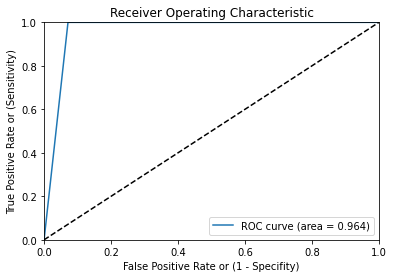

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
final_ion_set = pd.concat([X_df_sd, y_df], axis=1) # Merging inputs matrix and output vector for performing a 10-fold test.
final_ion_set
final_ion_set = final_ion_set.dropna(how='any',axis=0) 
final_ion_set

,Change,Torsion,RC,Curve,0
0,-1.354429,0.449607,1.541941,-0.561756,0
1,-1.645381,-0.665991,1.081640,1.006201,0
2,-0.045147,0.368131,1.081640,-1.188939,0
3,-0.336099,0.856989,0.161038,0.692610,0
4,-1.936333,-0.246075,0.621339,-0.352695,0
...,...,...,...,...,...
122,1.125853,-1.390406,-0.868948,1.235938,1
123,-0.389602,-0.789014,-0.468553,-1.436445,1
124,0.566748,0.843871,-0.421064,-0.331145,1
125,0.401207,-1.297534,1.158809,-0.801992,1


In [ ]:
# save the model 
filename = 'lr.sav'
pickle.dump(lr_classifier, open(filename, 'wb'))

### 10 fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import average_precision_score as APS
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as RS

APS_score_lr, AS_score_lr, f1_score_lr, RS_score_lr = [], [], [], []

kfold = KFold(10, True, 10)

for train, test in kfold.split(final_ion_set.values):
  Xi_train_kfold, Xi_test_kfold, yi_train_kfold, yi_test_kfold = final_ion_set.iloc[:,:4].values[train], final_ion_set.iloc[:,:4].values[test], \
                                                              final_ion_set.iloc[:,4].values[train], final_ion_set.iloc[:,4].values[test]
  
  ee = OneClassSVM(nu=0.01)
  yhat = ee.fit_predict(Xi_train_kfold)
  mask = yhat != -1
  Xi_train_kfold, yi_train_kfold = Xi_train_kfold[mask, :], yi_train_kfold[mask]

  lr_classifier.fit(Xi_train_kfold,yi_train_kfold) # Fitting the model.
  yi_pred_fold = lr_classifier.predict(Xi_test_kfold)  # Predicting output of the model by inputting x_test subset.
  APS_score_lr.append(APS(yi_test_kfold,yi_pred_fold))
  AS_score_lr.append(AS(yi_test_kfold,yi_pred_fold))
  f1_score_lr.append(f1(yi_test_kfold,yi_pred_fold))
  RS_score_lr.append(RS(yi_test_kfold,yi_pred_fold))


for i in range(10):
  print(f"For fold {i+1}, Average precision: {'%0.3f' %(APS_score_lr[i]*100)}%\t\tAccuracy: {'%0.3f' %(AS_score_lr[i]*100)}%\t\tF1:\
   {'%0.3f' %(f1_score_lr[i]*100)}%\t\tRecall: {'%0.3f' %(RS_score_lr[i]*100)}%\n")

print(f"\n\nThe max scores for Logistic regression are: \nAverage precision score: {'%0.3f' %(max(APS_score_lr)*100)}%\nAccuracy score:\
 {'%0.3f' %(max(AS_score_lr)*100)}%\nF1 s1ore: {'%0.3f' %(max(f1_score_lr)*100)}%\nRecall score: {'%0.3f' %(max(RS_score_lr)*100)}%")

For fold 1, Average precision: 88.889%		Accuracy: 92.308%		F1:   94.118%		Recall: 100.000%

For fold 2, Average precision: 100.000%		Accuracy: 100.000%		F1:   100.000%		Recall: 100.000%

For fold 3, Average precision: 75.748%		Accuracy: 76.923%		F1:   82.353%		Recall: 87.500%

For fold 4, Average precision: 85.714%		Accuracy: 92.308%		F1:   92.308%		Recall: 100.000%

For fold 5, Average precision: 77.778%		Accuracy: 84.615%		F1:   87.500%		Recall: 100.000%

For fold 6, Average precision: 84.327%		Accuracy: 69.231%		F1:   77.778%		Recall: 70.000%

For fold 7, Average precision: 62.500%		Accuracy: 76.923%		F1:   76.923%		Recall: 100.000%

For fold 8, Average precision: 87.500%		Accuracy: 91.667%		F1:   93.333%		Recall: 100.000%

For fold 9, Average precision: 52.667%		Accuracy: 66.667%		F1:   60.000%		Recall: 60.000%

For fold 10, Average precision: 100.000%		Accuracy: 100.000%		F1:   100.000%		Recall: 100.000%



The max scores for Logistic regression are: 
Average precision score: 100.

### Confusion Matrix

In [ ]:
# Confusion Matrix function
#adopted from https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Complete).ipynb

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[13  1]
 [ 0 12]]


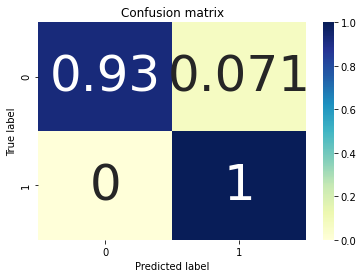

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = lr_classifier.classes_, title='Confusion matrix')

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.9285714285714286
sensitivity 1.0


# **SVM**

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

svm_classifier = SVC(kernel= 'rbf', gamma='auto') #after some research, we chose rbf
svm_classifier.fit(X_train, y_train)
y_predict_svm = svm_classifier.predict(X_test)

In [ ]:
# Use the predict method on the test data
errors = abs(y_predict_svm - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.12


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", svm_classifier.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", svm_classifier.score(X_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_svm))



The Training Accuracy is:  0.8913043478260869
The Testing Accuracy is:  0.8846153846153846


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.80      1.00      0.89        12

    accuracy                           0.88        26
   macro avg       0.90      0.89      0.88        26
weighted avg       0.91      0.88      0.88        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_svm).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.7857142857142857
sensitivity 1.0


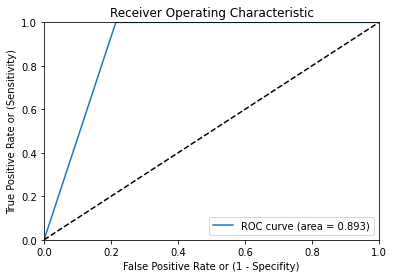

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_svm)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
# save the model 
filename = 'svm.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

### Confusion Matrix

[[11  3]
 [ 0 12]]


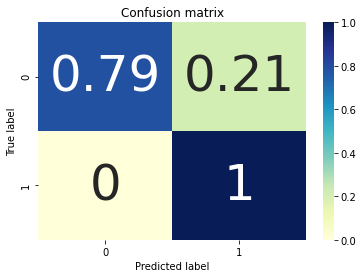

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict_svm)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = svm_classifier.classes_, title='Confusion matrix')

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf_classifier = RandomForestClassifier(max_depth=2, random_state=42)
rf_classifier.fit( X_train, y_train)
y_predict_rf = rf_classifier.predict(X_test)


In [ ]:
errors = abs(y_predict_rf - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.08 degrees.


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", rf_classifier.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", rf_classifier.score(X_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_rf))



The Training Accuracy is:  0.9021739130434783
The Testing Accuracy is:  0.9230769230769231


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.86      1.00      0.92        12

    accuracy                           0.92        26
   macro avg       0.93      0.93      0.92        26
weighted avg       0.93      0.92      0.92        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_rf).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.8571428571428571
sensitivity 1.0


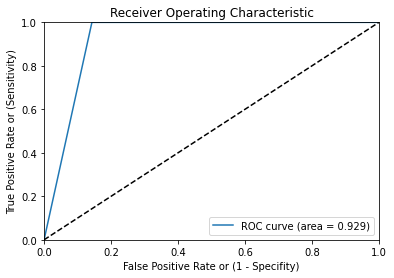

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
# save the model 
filename = 'rf.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

### Confusion Matrix

[[12  2]
 [ 0 12]]


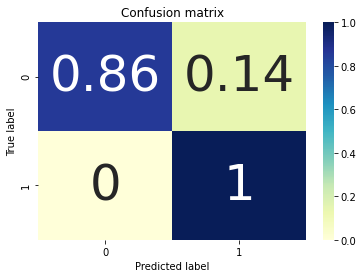

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict_rf)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = rf_classifier.classes_, title='Confusion matrix')

# **DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier( max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
y_predict_dt = decision_tree.predict(X_test)

In [ ]:
errors = abs(y_predict_dt - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.15


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", decision_tree.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", decision_tree.score(X_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_dt))



The Training Accuracy is:  0.9021739130434783
The Testing Accuracy is:  0.8461538461538461


              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.75      1.00      0.86        12

    accuracy                           0.85        26
   macro avg       0.88      0.86      0.85        26
weighted avg       0.88      0.85      0.84        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_dt).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.7142857142857143
sensitivity 1.0


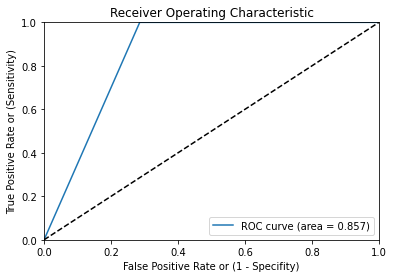

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_dt)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
# save the model 
filename = 'dt.sav'
pickle.dump(decision_tree, open(filename, 'wb'))

### 10 fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import average_precision_score as APS
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as RS

APS_score_dt, AS_score_dt, f1_score_dt, RS_score_dt = [], [], [], []

kfold = KFold(10, True, 10)

for train, test in kfold.split(final_ion_set.values):
  Xi_train_kfold, Xi_test_kfold, yi_train_kfold, yi_test_kfold = final_ion_set.iloc[:,:4].values[train], final_ion_set.iloc[:,:4].values[test], \
                                                              final_ion_set.iloc[:,4].values[train], final_ion_set.iloc[:,4].values[test]
  decision_tree.fit(Xi_train_kfold,yi_train_kfold) # Fitting the model.
  yi_pred_fold = decision_tree.predict(Xi_test_kfold)  # Predicting output of the model by inputting x_test subset.
  APS_score_dt.append(APS(yi_test_kfold,yi_pred_fold))
  AS_score_dt.append(AS(yi_test_kfold,yi_pred_fold))
  f1_score_dt.append(f1(yi_test_kfold,yi_pred_fold))
  RS_score_dt.append(RS(yi_test_kfold,yi_pred_fold))


for i in range(10):
  print(f"For fold {i+1}, Average precision: {'%0.3f' %(APS_score_dt[i]*100)}%\t\tAccuracy: {'%0.3f' %(AS_score_dt[i]*100)}%\t\tF1:\
   {'%0.3f' %(f1_score_dt[i]*100)}%\t\tRecall: {'%0.3f' %(RS_score_dt[i]*100)}%\n")

print(f"\n\nThe max scores for decision tree are: \nAverage precision score: {'%0.3f' %(max(APS_score_lr)*100)}%\nAccuracy score:\
 {'%0.3f' %(max(AS_score_dt)*100)}%\nF1 s1ore: {'%0.3f' %(max(f1_score_dt)*100)}%\nRecall score: {'%0.3f' %(max(RS_score_dt)*100)}%")

For fold 1, Average precision: 88.889%		Accuracy: 92.308%		F1:   94.118%		Recall: 100.000%

For fold 2, Average precision: 57.143%		Accuracy: 76.923%		F1:   72.727%		Recall: 100.000%

For fold 3, Average precision: 95.192%		Accuracy: 92.308%		F1:   93.333%		Recall: 87.500%

For fold 4, Average precision: 75.000%		Accuracy: 84.615%		F1:   85.714%		Recall: 100.000%

For fold 5, Average precision: 87.500%		Accuracy: 92.308%		F1:   93.333%		Recall: 100.000%

For fold 6, Average precision: 84.327%		Accuracy: 69.231%		F1:   77.778%		Recall: 70.000%

For fold 7, Average precision: 100.000%		Accuracy: 100.000%		F1:   100.000%		Recall: 100.000%

For fold 8, Average precision: 77.778%		Accuracy: 83.333%		F1:   87.500%		Recall: 100.000%

For fold 9, Average precision: 52.667%		Accuracy: 66.667%		F1:   60.000%		Recall: 60.000%

For fold 10, Average precision: 84.896%		Accuracy: 83.333%		F1:   87.500%		Recall: 87.500%



The max scores for decision tree are: 
Average precision score: 100.000%
Accur

### Confusion Matrix

In [ ]:
# Confusion Matrix function
#adopted from https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Complete).ipynb

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[10  4]
 [ 0 12]]


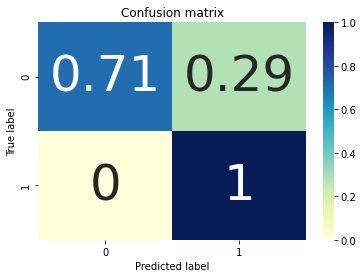

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict_dt)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = decision_tree.classes_, title='Confusion matrix')

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_dt).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.7142857142857143
sensitivity 1.0


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier              #we want to try learning through KNN
from sklearn.model_selection import train_test_split  
#x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2,random_state=42)      #split the data to training and testing set
#x_train,x_test,y_train,y_test = train_test_split(X_df_sd, y_df, test_size=0.2, random_state=10)
x_train=X_train
y_train=y_train
x_test=X_test

knn=KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)                   #first set these parameters and check the performance, we will later fine tune the parameters
knn=knn.fit(x_train,y_train)                       #fit the model to our train data
y_predict_kn = knn.predict(x_test)

In [ ]:
errors = abs(y_predict_kn - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.04


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", knn.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", knn.score(x_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_kn))



The Training Accuracy is:  0.9782608695652174
The Testing Accuracy is:  0.9615384615384616


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_kn).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.9285714285714286
sensitivity 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV       #This section is for tuning the parameters of the model using cross validation

knn2=KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 3), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':np.arange(20, 35),'p': np.arange(1, 8), 'metric':['minkowski','manhattan','chebyshev']}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_
knn_gscv.best_score_



knn_gscv.score(x_test,y_test)

0.9615384615384616

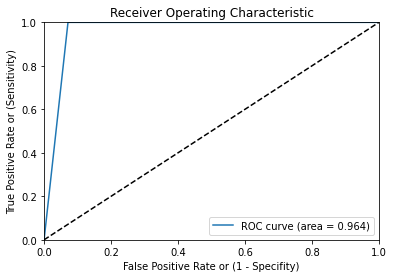

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_kn)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
# save the model 
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

# 10 fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import average_precision_score as APS
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as RS

APS_score_knn, AS_score_knn, f1_score_knn, RS_score_knn = [], [], [], []

kfold = KFold(10, True, 10)

for train, test in kfold.split(final_ion_set.values):
  Xi_train_kfold, Xi_test_kfold, yi_train_kfold, yi_test_kfold = final_ion_set.iloc[:,:4].values[train], final_ion_set.iloc[:,:4].values[test], \
                                                              final_ion_set.iloc[:,4].values[train], final_ion_set.iloc[:,4].values[test]
  ee = OneClassSVM(nu=0.01)
  yhat = ee.fit_predict(Xi_train_kfold)
  mask = yhat != -1
  Xi_train_kfold, yi_train_kfold = Xi_train_kfold[mask, :], yi_train_kfold[mask]
  
  
  knn.fit(Xi_train_kfold,yi_train_kfold) # Fitting the model.
  yi_pred_fold = knn.predict(Xi_test_kfold)  # Predicting output of the model by inputting x_test subset.
  APS_score_knn.append(APS(yi_test_kfold,yi_pred_fold))
  AS_score_knn.append(AS(yi_test_kfold,yi_pred_fold))
  f1_score_knn.append(f1(yi_test_kfold,yi_pred_fold))
  RS_score_knn.append(RS(yi_test_kfold,yi_pred_fold))


for i in range(10):
  print(f"For fold {i+1}, Average precision: {'%0.3f' %(APS_score_knn[i]*100)}%\t\tAccuracy: {'%0.3f' %(AS_score_knn[i]*100)}%\t\tF1:\
   {'%0.3f' %(f1_score_dt[i]*100)}%\t\tRecall: {'%0.3f' %(RS_score_knn[i]*100)}%\n")

print(f"\n\nThe max scores for knn are: \nAverage precision score: {'%0.3f' %(max(APS_score_knn)*100)}%\nAccuracy score:\
 {'%0.3f' %(max(AS_score_knn)*100)}%\nF1 s1ore: {'%0.3f' %(max(f1_score_knn)*100)}%\nRecall score: {'%0.3f' %(max(RS_score_knn)*100)}%")

For fold 1, Average precision: 100.000%		Accuracy: 100.000%		F1:   94.118%		Recall: 100.000%

For fold 2, Average precision: 80.000%		Accuracy: 92.308%		F1:   72.727%		Recall: 100.000%

For fold 3, Average precision: 100.000%		Accuracy: 100.000%		F1:   93.333%		Recall: 100.000%

For fold 4, Average precision: 100.000%		Accuracy: 100.000%		F1:   85.714%		Recall: 100.000%

For fold 5, Average precision: 100.000%		Accuracy: 100.000%		F1:   93.333%		Recall: 100.000%

For fold 6, Average precision: 84.327%		Accuracy: 69.231%		F1:   77.778%		Recall: 70.000%

For fold 7, Average precision: 71.692%		Accuracy: 84.615%		F1:   100.000%		Recall: 80.000%

For fold 8, Average precision: 87.500%		Accuracy: 91.667%		F1:   87.500%		Recall: 100.000%

For fold 9, Average precision: 83.333%		Accuracy: 91.667%		F1:   60.000%		Recall: 100.000%

For fold 10, Average precision: 83.333%		Accuracy: 66.667%		F1:   87.500%		Recall: 50.000%



The max scores for knn are: 
Average precision score: 100.000%
Accuracy

### Confusion Matrix

[[13  1]
 [ 0 12]]


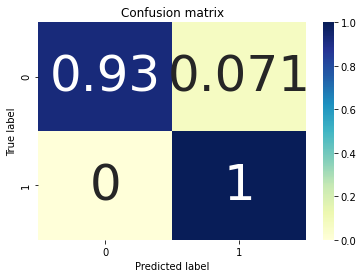

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict_kn)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = knn.classes_, title='Confusion matrix')

In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_kn).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.9285714285714286
sensitivity 1.0


# **Naive Bayes**

In [ ]:
###############Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb= gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)                 #fit the model to our train data
y_predict_gnb = gnb.predict(x_test)

In [ ]:
errors = abs(y_predict_gnb - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.12


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", gnb.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", gnb.score(x_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_gnb))



The Training Accuracy is:  0.7934782608695652
The Testing Accuracy is:  0.8846153846153846


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.85      0.92      0.88        12

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.88        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_gnb).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.8571428571428571
sensitivity 0.9166666666666666


In [ ]:
from sklearn.model_selection import GridSearchCV          #This section is for tuning the parameters of the model using cross validation

gnb2=GaussianNB()
param_grid = {'var_smoothing': [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]}
gnb_gscv = GridSearchCV(gnb2, param_grid, cv=10)
gnb_gscv.fit(x_train, y_train)
gnb_gscv.best_params_
gnb_gscv.best_score_



gnb_gscv.score(x_test,y_test)

0.8846153846153846

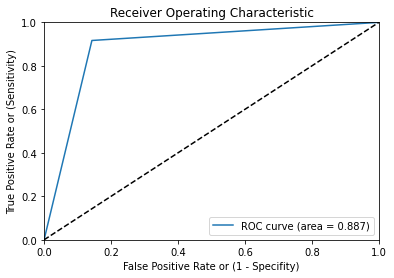

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_gnb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

In [ ]:
# save the model 
filename = 'gnb_gscv.sav'
pickle.dump(gnb_gscv, open(filename, 'wb'))

### Confusion Matrix

[[12  2]
 [ 1 11]]


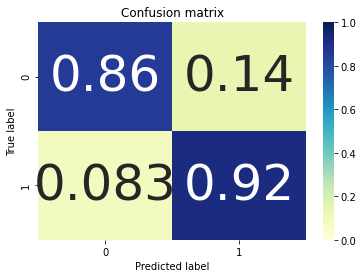

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict_gnb)
print(cm)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = gnb.classes_, title='Confusion matrix')

# KMeans

In [ ]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

kmn=KMeans(n_clusters=2)
kmn=kmn.fit(x_train)
y_predict_kmn=kmn.predict(x_train)

kmn.score(x_test,y_test)
score = metrics.silhouette_score(x_train, kmn.labels_, metric='euclidean')
score

score2 = metrics.silhouette_score(x_train, kmn.labels_, metric='euclidean')
score2

0.2640896481890339

# **PCA**

<BarContainer object of 4 artists>

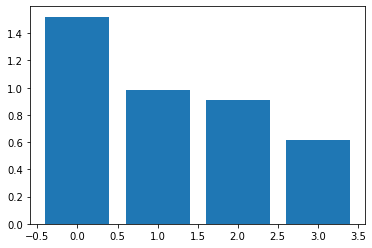

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()    #define pca
pca.fit(X_df_sd)    #fit the data to pca
transformed=pca.transform(X_df_sd)  #transform the data using pca
nfeatures=range(pca.n_components_) 
var_features=pca.explained_variance_
plt.bar(nfeatures,var_features)

In [ ]:
dime_r=PCA(n_components=4)     #choose the number of features for this study
dime_r.fit(X_df_sd)

dime_r_transformed=dime_r.transform(X_df_sd)   #transform the data using pca
d     # transform the data back to dataframe
# print(dime_r_transformed)
x_train,x_test,y_train,y_test=train_test_split(dime_r_transformed,y_df,test_size=0.2,random_state=10)   #split test and train
y_test=y_test.squeeze() #dataframe to series

In [ ]:
knn=knn.fit(x_train,y_train)                       #fit the model to our train data
y_predict_kn = knn.predict(x_test)         # predict the test data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_predict_kn

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1])

In [ ]:
errors = abs(y_predict_kn - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.04


In [ ]:
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", knn.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", knn.score(x_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, y_predict_kn))



The Training Accuracy is:  0.9801980198019802
The Testing Accuracy is:  0.9615384615384616


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, y_predict_kn).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.9285714285714286
sensitivity 1.0


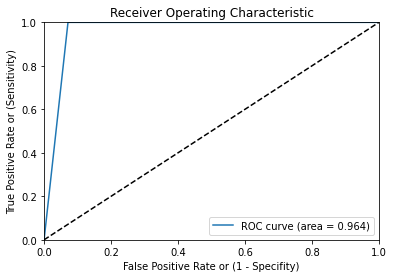

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

**LR using PCA**

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_classifier = LogisticRegression(random_state=10, solver = 'lbfgs')
lr_classifier.fit(x_train, y_train)
y_predict_lr = lr_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predictions = lr_classifier.predict(x_test)# Calculate the absolute errors
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Mean Absolute Error: 0.08


In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
print('\n')
# Accuracy on Train
print("The Training Accuracy is: ", lr_classifier.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", lr_classifier.score(x_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_test, predictions))



The Training Accuracy is:  0.8514851485148515
The Testing Accuracy is:  0.9230769230769231


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.86      1.00      0.92        12

    accuracy                           0.92        26
   macro avg       0.93      0.93      0.92        26
weighted avg       0.93      0.92      0.92        26



In [ ]:
tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
specificity=tn/(tn+fp)
print("specificity",specificity)
sensitivity=tp/(tp+fn)
print("sensitivity",sensitivity)

specificity 0.8571428571428571
sensitivity 1.0


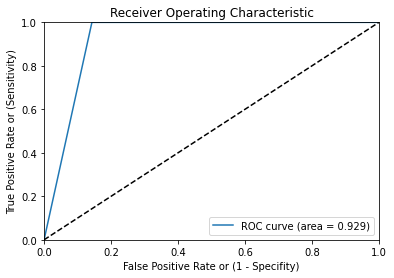

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#helped from stackoverflow.com

# **T test**
We want to see if our models are  are statistically different. We choose to do the t test with f1.

In [ ]:
X_df_sd = X_df_sd.to_numpy()
y_df = y_df.to_numpy()
#this part might be needed based on the environment you use to run this code
!pip install mlxtend

In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv
# check if difference between algorithms is real
#comparing svm with rf
t, p = paired_ttest_kfold_cv(estimator1= rf_classifier, 
                          estimator2=svm_classifier, 
                          X=X_df_sd, 
                          y=y_df.ravel(),
                          cv=10,
                          scoring='f1', 
                          shuffle=True,
                          random_seed=10)
print(f' P-value is = {p:.3f}')
print(f' t-statistics is = {t:.3f}')

if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')
#https://docs.silverhammer.ai/generated/silverhammer.benchmark.statistics.paired_ttest_kfold_cv.html

 P-value is = 0.737
 t-statistics is = 0.346
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv
# check if difference between algorithms is real
#comparing lr with knn
t, p = paired_ttest_kfold_cv(estimator1= lr_classifier, 
                          estimator2=knn, 
                          X=X_df_sd, 
                          y=y_df.ravel(),
                          cv=10,
                          scoring='f1', 
                          shuffle=True,
                          random_seed=10)
print(f' P-value is = {p:.3f}')
print(f' t-statistics is = {t:.3f}')

if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')
#https://docs.silverhammer.ai/generated/silverhammer.benchmark.statistics.paired_ttest_kfold_cv.html

NameError: ignored

 We cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.

# Resources
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Complete).ipynb

https://seaborn.pydata.org/

https://scikit-learn.org/

https://docs.scipy.org/doc/scipy/reference/stats.html

https://pandas.pydata.org/

https://docs.silverhammer.ai

http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_kfold_cv/

https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/

https://stackoverflow.com/

https://towardsdatascience.com/

https://scikit-learn.org/stable/

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

https://github.com/Pitsillides91/Python-Tutorials/blob/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20-%20Logistic%20Regression%20Example%20(Complete).ipynb

ECE720 project, Winter 2021, Reyhaneh Ababzadeh